In [1]:
##############################################################################################################
# DESCRIPTION: Entrenado con imágenes Black. Se han eliminado de validation.
#              
# RESULTS:     
#              
##############################################################################################################

In [13]:
######################
# CONFIG & HYPERPARAMS
######################

class HyperParams:
    pass

IMG_PATH = "C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/"

hyperparams = HyperParams()
hyperparams.IMG_WIDTH = 64
hyperparams.IMG_HEIGHT = 64
hyperparams.EPOCHS = 600 #10000
hyperparams.BATCH_SIZE = 16
hyperparams.START_NEURONS = 8 # UNET
hyperparams.LOSS = 'mean_absolute_error'

IMG_WIDTH = hyperparams.IMG_WIDTH
IMG_HEIGHT = hyperparams.IMG_HEIGHT

IMG_CASE = str(IMG_WIDTH) +  "/0100_1000"
SAVED_MODEL = "0100_1000-64-a"

IMG_PATH_VALID = IMG_PATH + "validation/"
IMG_PATH_TEST = IMG_PATH + "test/"
IMG_PATH_TRAIN = IMG_PATH

DEST_TESTS = os.path.abspath(os.path.join('../../../out_tests/', SAVED_MODEL))

class RadianceLimits:
    pass
radiance_limits = RadianceLimits()
radiance_limits.noisy_min = 0
radiance_limits.noisy_max = 0.0898
radiance_limits.nitid_min = 0
radiance_limits.nitid_max = 0.3248

#from tensorflow.keras.optimizers import Adam
#hyperparams.OPTIMIZER = Adam(learning_rate=0.0001)
from tensorflow.keras.optimizers import Nadam
hyperparams.OPTIMIZER = Nadam(learning_rate=0.0001)

In [3]:
##################
# IMPORTS
##################

import tensorflow as tf
from tensorflow.compat.v1 import InteractiveSession

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

import numpy as np
import tensorflow 
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)
import os, sys
module_path = os.path.abspath(os.path.join('../../support/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import DatasetUtilsTifF as dsutils
import TrainModelB as train
import ReportsK as reports

#nvidia-smi

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10398728229552788684
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5462667264
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3346352947225267523
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:2b:00.0, compute capability: 8.6"
]
Tensorflow version: 2.6.0
Keras Version: 2.6.0
GPU is available


In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
##################
# MODEL DEFINITION
##################

import UnetF as model_factory

model = model_factory.buildModel(hyperparams)
model.summary()
model.optimizer.get_config()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 8)    80          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 8)    584         conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 8)    0           conv2d_1[0][0]                   
______________________________________________________________________________________________

{'name': 'Nadam',
 'learning_rate': 0.0001,
 'decay': 0.004,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07}

In [17]:
##################
# PREPARE DATA
##################

train_noisy_files, train_nitid_files, train_noisy, train_nitid = dsutils.readDataset( IMG_PATH_TRAIN, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
val_noisy_files, val_nitid_files, val_noisy, val_nitid = dsutils.readDataset( IMG_PATH_VALID, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)

train_noisy, train_nitid = dsutils.reshapeDataset( train_noisy, train_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
val_noisy, val_nitid = dsutils.reshapeDataset( val_noisy, val_nitid, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )

Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/
Noisy files:9696
Nitid files:9696
Read dataset. Path: C:/Projects/VenusDenoise/dataset/cases/64/0100_1000/validation/
Noisy files:2309
Nitid files:2309


In [8]:
##################
# TRAIN MODEL
##################
#import tensorflow as tf
#from tensorflow.compat.v1.keras.backend import set_session
#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
#config.log_device_placement = True  # to log device placement (on which device the operation ran)
#sess = tf.compat.v1.Session(config=config)
#set_session(sess)


hist = train.fit( model, hyperparams, train_noisy, train_nitid, val_noisy, val_nitid )

Epoch 1/600
606/606 [==============================] - 27s 35ms/step - loss: 0.1535 - mean_absolute_error: 0.1535 - val_loss: 0.1553 - val_mean_absolute_error: 0.1553
Epoch 2/600
606/606 [==============================] - 20s 34ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.1553 - val_mean_absolute_error: 0.1553
Epoch 3/600
606/606 [==============================] - 21s 34ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.1553 - val_mean_absolute_error: 0.1553
Epoch 4/600
606/606 [==============================] - 21s 34ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.1553 - val_mean_absolute_error: 0.1553
Epoch 5/600
606/606 [==============================] - 21s 34ms/step - loss: 0.1440 - mean_absolute_error: 0.1440 - val_loss: 0.1553 - val_mean_absolute_error: 0.1553
Epoch 6/600
606/606 [==============================] - 21s 34ms/step - loss: 0.0468 - mean_absolute_error: 0.0468 - val_loss: 0.0230 - val_mean_absolute_error: 0.023

Epoch 50/600
606/606 [==============================] - 21s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - val_loss: 0.0198 - val_mean_absolute_error: 0.0198
Epoch 51/600
606/606 [==============================] - 21s 34ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196
Epoch 52/600
606/606 [==============================] - 21s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - val_loss: 0.0198 - val_mean_absolute_error: 0.0198
Epoch 53/600
606/606 [==============================] - 21s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196
Epoch 54/600
606/606 [==============================] - 21s 34ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - val_loss: 0.0205 - val_mean_absolute_error: 0.0205
Epoch 55/600
606/606 [==============================] - 21s 34ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - val_loss: 0.0196 - val_mean_absolute_error:

Epoch 99/600
606/606 [==============================] - 21s 35ms/step - loss: 0.0168 - mean_absolute_error: 0.0168 - val_loss: 0.0208 - val_mean_absolute_error: 0.0208
Epoch 100/600
606/606 [==============================] - 21s 35ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - val_loss: 0.0207 - val_mean_absolute_error: 0.0207
Epoch 101/600
606/606 [==============================] - 21s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - val_loss: 0.0214 - val_mean_absolute_error: 0.0214
Epoch 102/600
606/606 [==============================] - 21s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - val_loss: 0.0204 - val_mean_absolute_error: 0.0204
Epoch 103/600
606/606 [==============================] - 21s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - val_loss: 0.0199 - val_mean_absolute_error: 0.0199
Epoch 104/600
606/606 [==============================] - 21s 35ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - val_loss: 0.0193 - val_mean_absolute_e

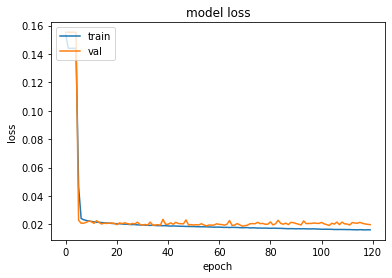

In [9]:
##################
# REPORTS
##################

reports.plotHistory( hist )

In [18]:
##################
# PREDICTIONS
##################
ACCURACY_THRESHOLD = 0.01
predictions_metrics, predictions_headers \
    = reports.calcPredictionMetrics( model, val_noisy, val_nitid, ACCURACY_THRESHOLD, \
                                    save_pred = True, save_path = DEST_TESTS, \
                                    noisy_files = val_noisy_files, nitid_files = val_nitid_files, \
                                    max_nitid= radiance_limits.nitid_max  )

Black image found
Black image found
Images count =2309
Best RMSENZ  =2181 (0.94)
Best MAENZ   =2181 (0.94)
Best Accuracy=2021 (0.88)
RMSE-NZ  Pred=0.0239  Noisy=0.0943
MAE-NZ   Pred=0.0204  Noisy=0.0904
PSNR     Pred=20.4 dB Noisy=9.3 dB
Accuracy Pred=0.41    Noisy=0.09
SSM      Pred=0.95    Noisy=0.67
HOG MSE  Pred=0.08    Noisy=0.12


In [ ]:
test_noisy_files, test_nitid_files, test_noisy, test_nitid = dsutils.readDataset( IMG_PATH_TEST, hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT, radiance_limits)
test_noisy, test_nitid = dsutils.reshapeDataset( test_noisy, test_nitid,  hyperparams.IMG_WIDTH, hyperparams.IMG_HEIGHT )
test_indexes = np.arange(0,test_noisy.shape[0])

reports.predictByIndexes( model, test_noisy, test_nitid, test_noisy_files, test_nitid_files, test_indexes, ACCURACY_THRESHOLD )

In [19]:
model.save('C:/Projects/VenusDenoise/saves/unet-100_1000-64-a')

INFO:tensorflow:Assets written to: C:/Projects/VenusDenoise/saves/unet-100_1000-64-a\assets
